# Loading Data 

In [1]:
import pandas as pd

file_path = r'c:\Users\91735\OneDrive\Desktop\analyst content\data\projects\Antartica_Global_Assignment\Performance_Analytics&Projections_for_Business_Development\Data\Data Assignment.xlsx'

# Read all sheets into a dictionary of DataFrames
dfs = pd.read_excel(file_path, sheet_name=None)

# Extracting each sheet into separate DataFrames
df_Raj = dfs['Raj']
df_Arya = dfs['Arya']
df_Ali = dfs['Ali']

## Checking and Dealing for missing values
#### Removing fields where 'Leads',	'Time spent on LG (mins)' and	'Avg Time Per Lead (mins)' values are missing preassuming these days will be a holiday

In [2]:

df_Ali.isnull().sum()
df_Raj.isnull().sum()
df_Arya.isnull().sum()

Day                          0
Date                         0
Leads                       20
Time spent on LG (mins)     20
Avg Time Per Lead (mins)    20
Daily Team Review           20
No. of Incomplete Leads     20
dtype: int64

In [3]:
columns_to_check = ['Leads', 'Time spent on LG (mins)', 'Avg Time Per Lead (mins)']

# Create a new dictionary to store the cleaned DataFrames
cleaned_dfs = {}

# Iterate over each sheet in the original dictionary and drop rows with missing values in the specified columns
for sheet_name, df in dfs.items():
    cleaned_dfs[sheet_name] = df.dropna(subset=columns_to_check)

df_Raj_cleaned = cleaned_dfs['Raj']
df_Arya_cleaned = cleaned_dfs['Arya']
df_Ali_cleaned = cleaned_dfs['Ali']


In [4]:

df_Raj_cleaned.isnull().sum()

Day                         0
Date                        0
Leads                       0
Time spent on LG (mins)     0
Avg Time Per Lead (mins)    0
Daily Team Review           1
No. of Incomplete Leads     1
dtype: int64

Cleaning Raj dataframe

In [5]:

df_Raj_cleaned.loc[:, 'Daily Team Review'] = df_Raj_cleaned['Daily Team Review'].bfill()
df_Raj_cleaned.loc[:, 'No. of Incomplete Leads'] = df_Raj_cleaned['No. of Incomplete Leads'].bfill()


In [6]:
df_Raj_cleaned.tail()

,Day,Date,Leads,Time spent on LG (mins),Avg Time Per Lead (mins),Daily Team Review,No. of Incomplete Leads
56,Mon,2023-08-07,11.0,250.0,23.0,Attended,0.0
57,Tue,2023-08-08,10.0,190.0,19.0,Attended,0.0
58,Wed,2023-08-09,10.0,190.0,19.0,Attended,0.0
59,Thu,2023-08-10,10.0,180.0,18.0,Missed,0.0
60,Fri,2023-08-11,11.0,200.0,18.0,NaN,NaN


# Outlier Detection

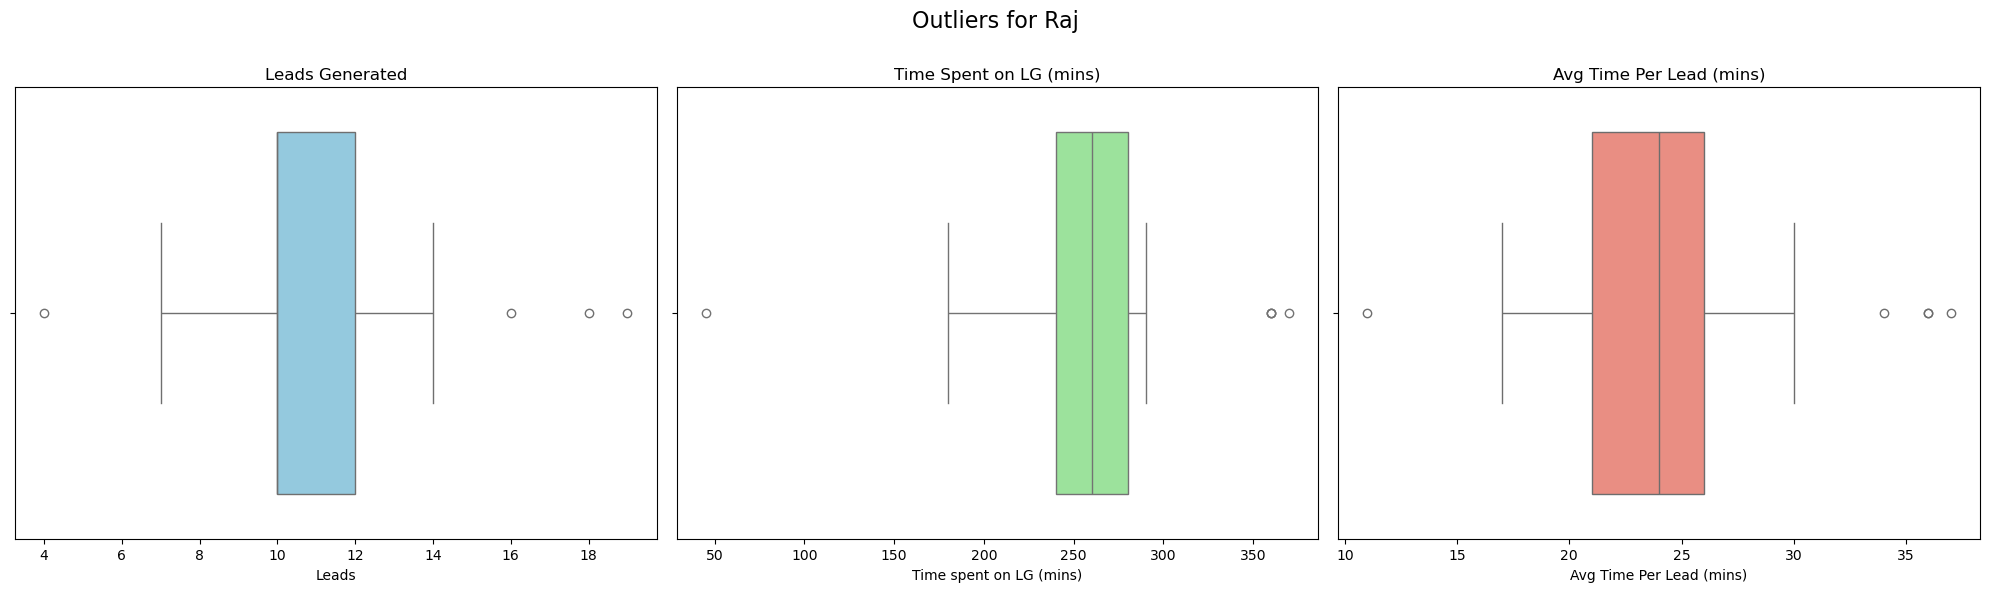

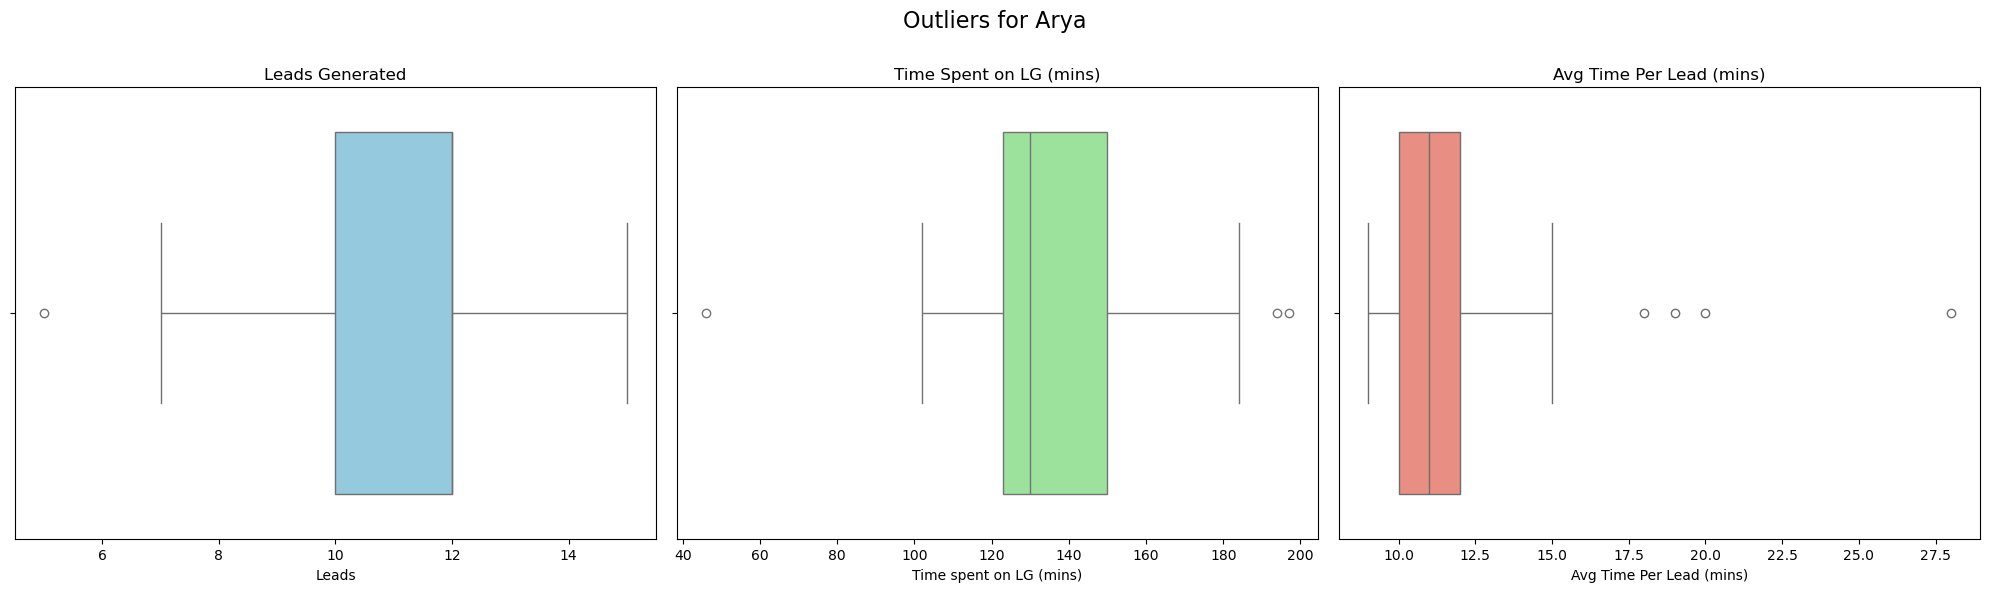

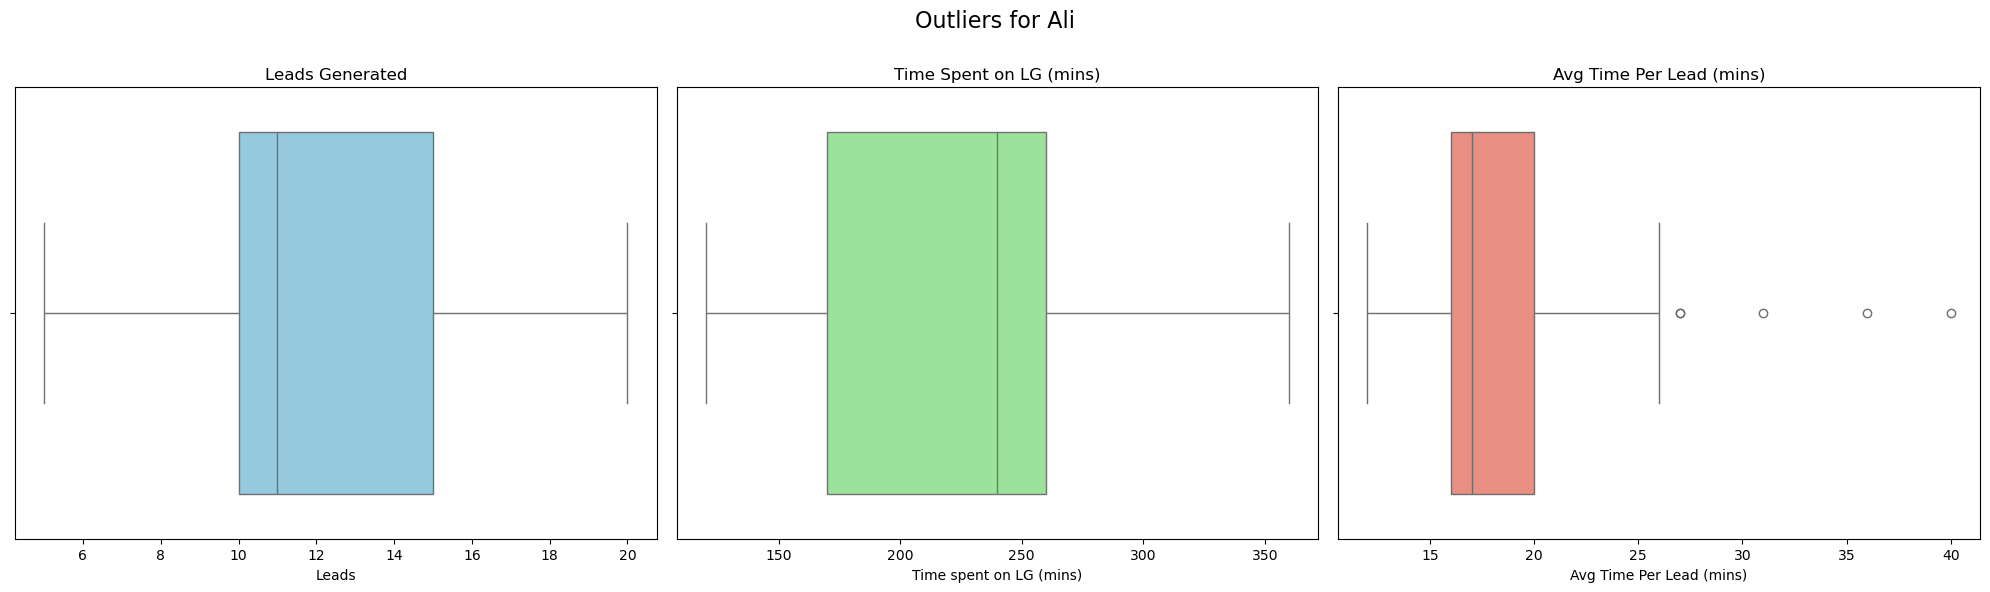

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ['skyblue', 'lightgreen', 'salmon']

# Iterate over each sheet
for sheet_name1, data in cleaned_dfs.items():
    # Check if any of the three columns exist in the current sheet
    if any(col in data.columns for col in ['Leads', 'Time spent on LG (mins)', 'Avg Time Per Lead (mins)']):
        # Creating a figure with 3 subplots (1 row, 3 columns)
        fig, axes = plt.subplots(1, 3, figsize=(20, 6))
        fig.suptitle(f'Outliers for {sheet_name1}', fontsize=16)

        # Plot the boxplot for 'Leads' if it exists
        if 'Leads' in data.columns:
            sns.boxplot(x=data['Leads'], ax=axes[0], color=colors[0])
            axes[0].set_title('Leads Generated')

        # Plot the boxplot for 'Time spent on LG (mins)' if it exists
        if 'Time spent on LG (mins)' in data.columns:
            sns.boxplot(x=data['Time spent on LG (mins)'], ax=axes[1], color=colors[1])
            axes[1].set_title('Time Spent on LG (mins)')

        # Plot the boxplot for 'Avg Time Per Lead (mins)' if it exists
        if 'Avg Time Per Lead (mins)' in data.columns:
            sns.boxplot(x=data['Avg Time Per Lead (mins)'], ax=axes[2], color=colors[2])
            axes[2].set_title('Avg Time Per Lead (mins)')

        plt.tight_layout()
        plt.subplots_adjust(top=0.85)
        plt.show()


## Outlier Analysis

1) **Leads Generated**  
   - There are a few outliers in the case of RAJ. These outliers are significant for further analysis, as they indicate that on certain days, RAJ generated an exceptionally high number of leads.

2) **Time Spent on Lead Generation**  
   - Outliers in this category are also important, as they suggest that on certain days, the time spent on lead generation was unusually low. This may correlate with a lower number of leads generated on those days.

3) **Average Time per Lead**  
   - This column exhibits the most outliers, highlighting the variability in the average time spent per lead. This variability is crucial for our performance analysis, as it may indicate differences in efficiency depending on the number of leads generated and the time spent on lead generation.
